Predicting Patient Readmission


Background

It was reported that in 2011 more than 3.3 million patients were readmitted in the US within 30 days of being discharged, and they were associated with about $41 billion in hospital costs. The need for readmission indicates that inadequate care was provided to the patient at the time of first admission. The readmission rate has become an important metric measuring the overall quality of a hospital.

Diabetes is the 7th leading cause of death and affects about 23.6 million people in the US. 1.4 million Americans are diagnosed with diabetes every year. Hospital readmission being a major concern in diabetes care, over 250 million dollars was spent on treatment of readmitted diabetic patients in 2011. Early identification of patients facing a high risk of readmission can enable healthcare providers to conduct additional investigations and possibly prevent future readmissions.

In this project, I build a machine learning classifier model to predict diabetes patients with high risk of readmission. Note that higher sensitivity (recall) is more desirable for hospitals because it is more crucial to correctly identify "high risk" patients who are likely to be readmitted than identifying "low risk" patients.

Dataset Description

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes 50 features representing 101766 diabetes patients and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria:

It is an inpatient encounter (a hospital admission).
It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
The length of stay was at least 1 day and at most 14 days.
Laboratory tests were performed during the encounter.
Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
print(os.getcwd())

E:\hospital emergency\hospital emergency


In [4]:

os.chdir("E:\\P\\pras\\HOSPITAL EMERGENCY")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:\\P\\pras\\HOSPITAL EMERGENCY'

In [5]:
emergency = pd.read_csv('diabetic_data.csv')

In [6]:
emergency.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
emergency.shape

(101766, 50)

In [8]:
emergency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [9]:
list(emergency.columns)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

# PREPROCESSING

In [10]:
emergency.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [11]:
emergency.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [12]:
emergency.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [13]:
emergency.weight.value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

the response variable 'readmitted' in the original dataset contains three categories.

11% of patients were readmitted within 30 days (<30)

35% of patients were readmitted after 30 days (>30)

54% of patients were never readmitted (NO)

# Feature Engineering and EDA
Explore data analysis on each feature and decide how to deal with them.

Text(0.5, 1.0, 'Patients Readmitted Based On Emergency')

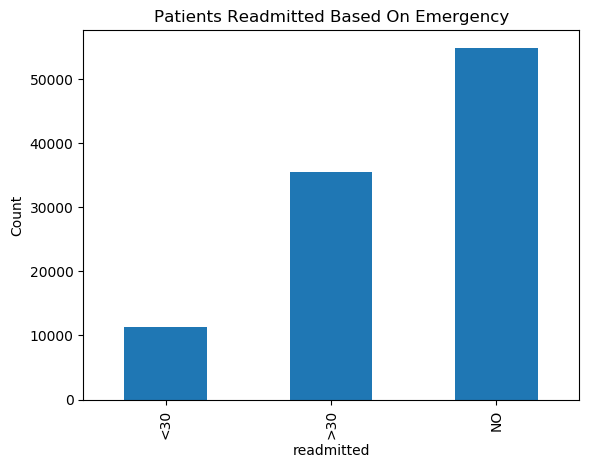

In [14]:
emergency.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')
plt.title("Patients Readmitted Based On Emergency")

# 30 %

recode the response variable so that it becomes a binary classification task.

'0' means no readmission

'1' means readmission no matter how many days after being discharged

In [14]:
emergency['readmitted'] = pd.Series([0 if val == 'NO' else 1 for val in emergency['readmitted']])
hosp_emergency = emergency

Text(0.5,1,'Patients Readmitted Based On Emergency')

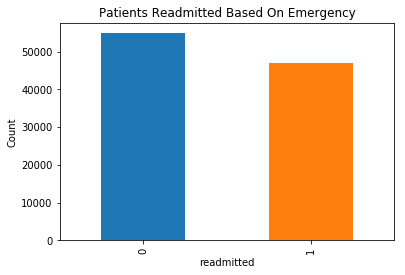

In [15]:
# plot 'readmitted' again to see the change
hosp_emergency.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')
plt.title("Patients Readmitted Based On Emergency")

# Feature Scaling

In [16]:
# remove irrelevant features
emergency.drop(['encounter_id', 'patient_nbr', 'payer_code'], axis=1, inplace=True)

In [17]:
# check NA in 'weight'
emergency[emergency['weight'] == '?'].shape[0] * 1.0 / emergency.shape[0]

0.9685847925633315

In [18]:
# check NA in 'medical_specialty'
emergency[emergency['medical_specialty'] == '?'].shape[0] * 1.0 / emergency.shape[0]

0.49082208203132677

In [19]:
# remove 'weight' and 'medical_specialty' because it's hard to do imputation on them
emergency.drop(['weight', 'medical_specialty'], axis=1, inplace=True)

In [20]:
emergency.shape

(101766, 45)

In [21]:
# remove rows that have NA in 'race', 'diag_1', 'diag_2', or 'diag_3'
# remove rows that have invalid values in 'gender'
emergency = emergency[emergency['race'] != '?']
emergency = emergency[emergency['diag_1'] != '?']
emergency = emergency[emergency['diag_2'] != '?']
emergency = emergency[emergency['diag_3'] != '?']
emergency = emergency[emergency['gender'] != 'Unknown/Invalid']

In [22]:
emergency.shape

(98052, 45)

Text(0,0.5,'Count')

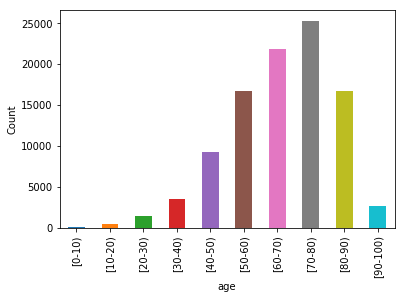

In [23]:
# check 'age' feature
emergency.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

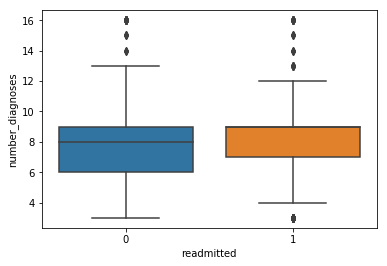

In [24]:
sns.boxplot(emergency.readmitted,emergency.number_diagnoses)

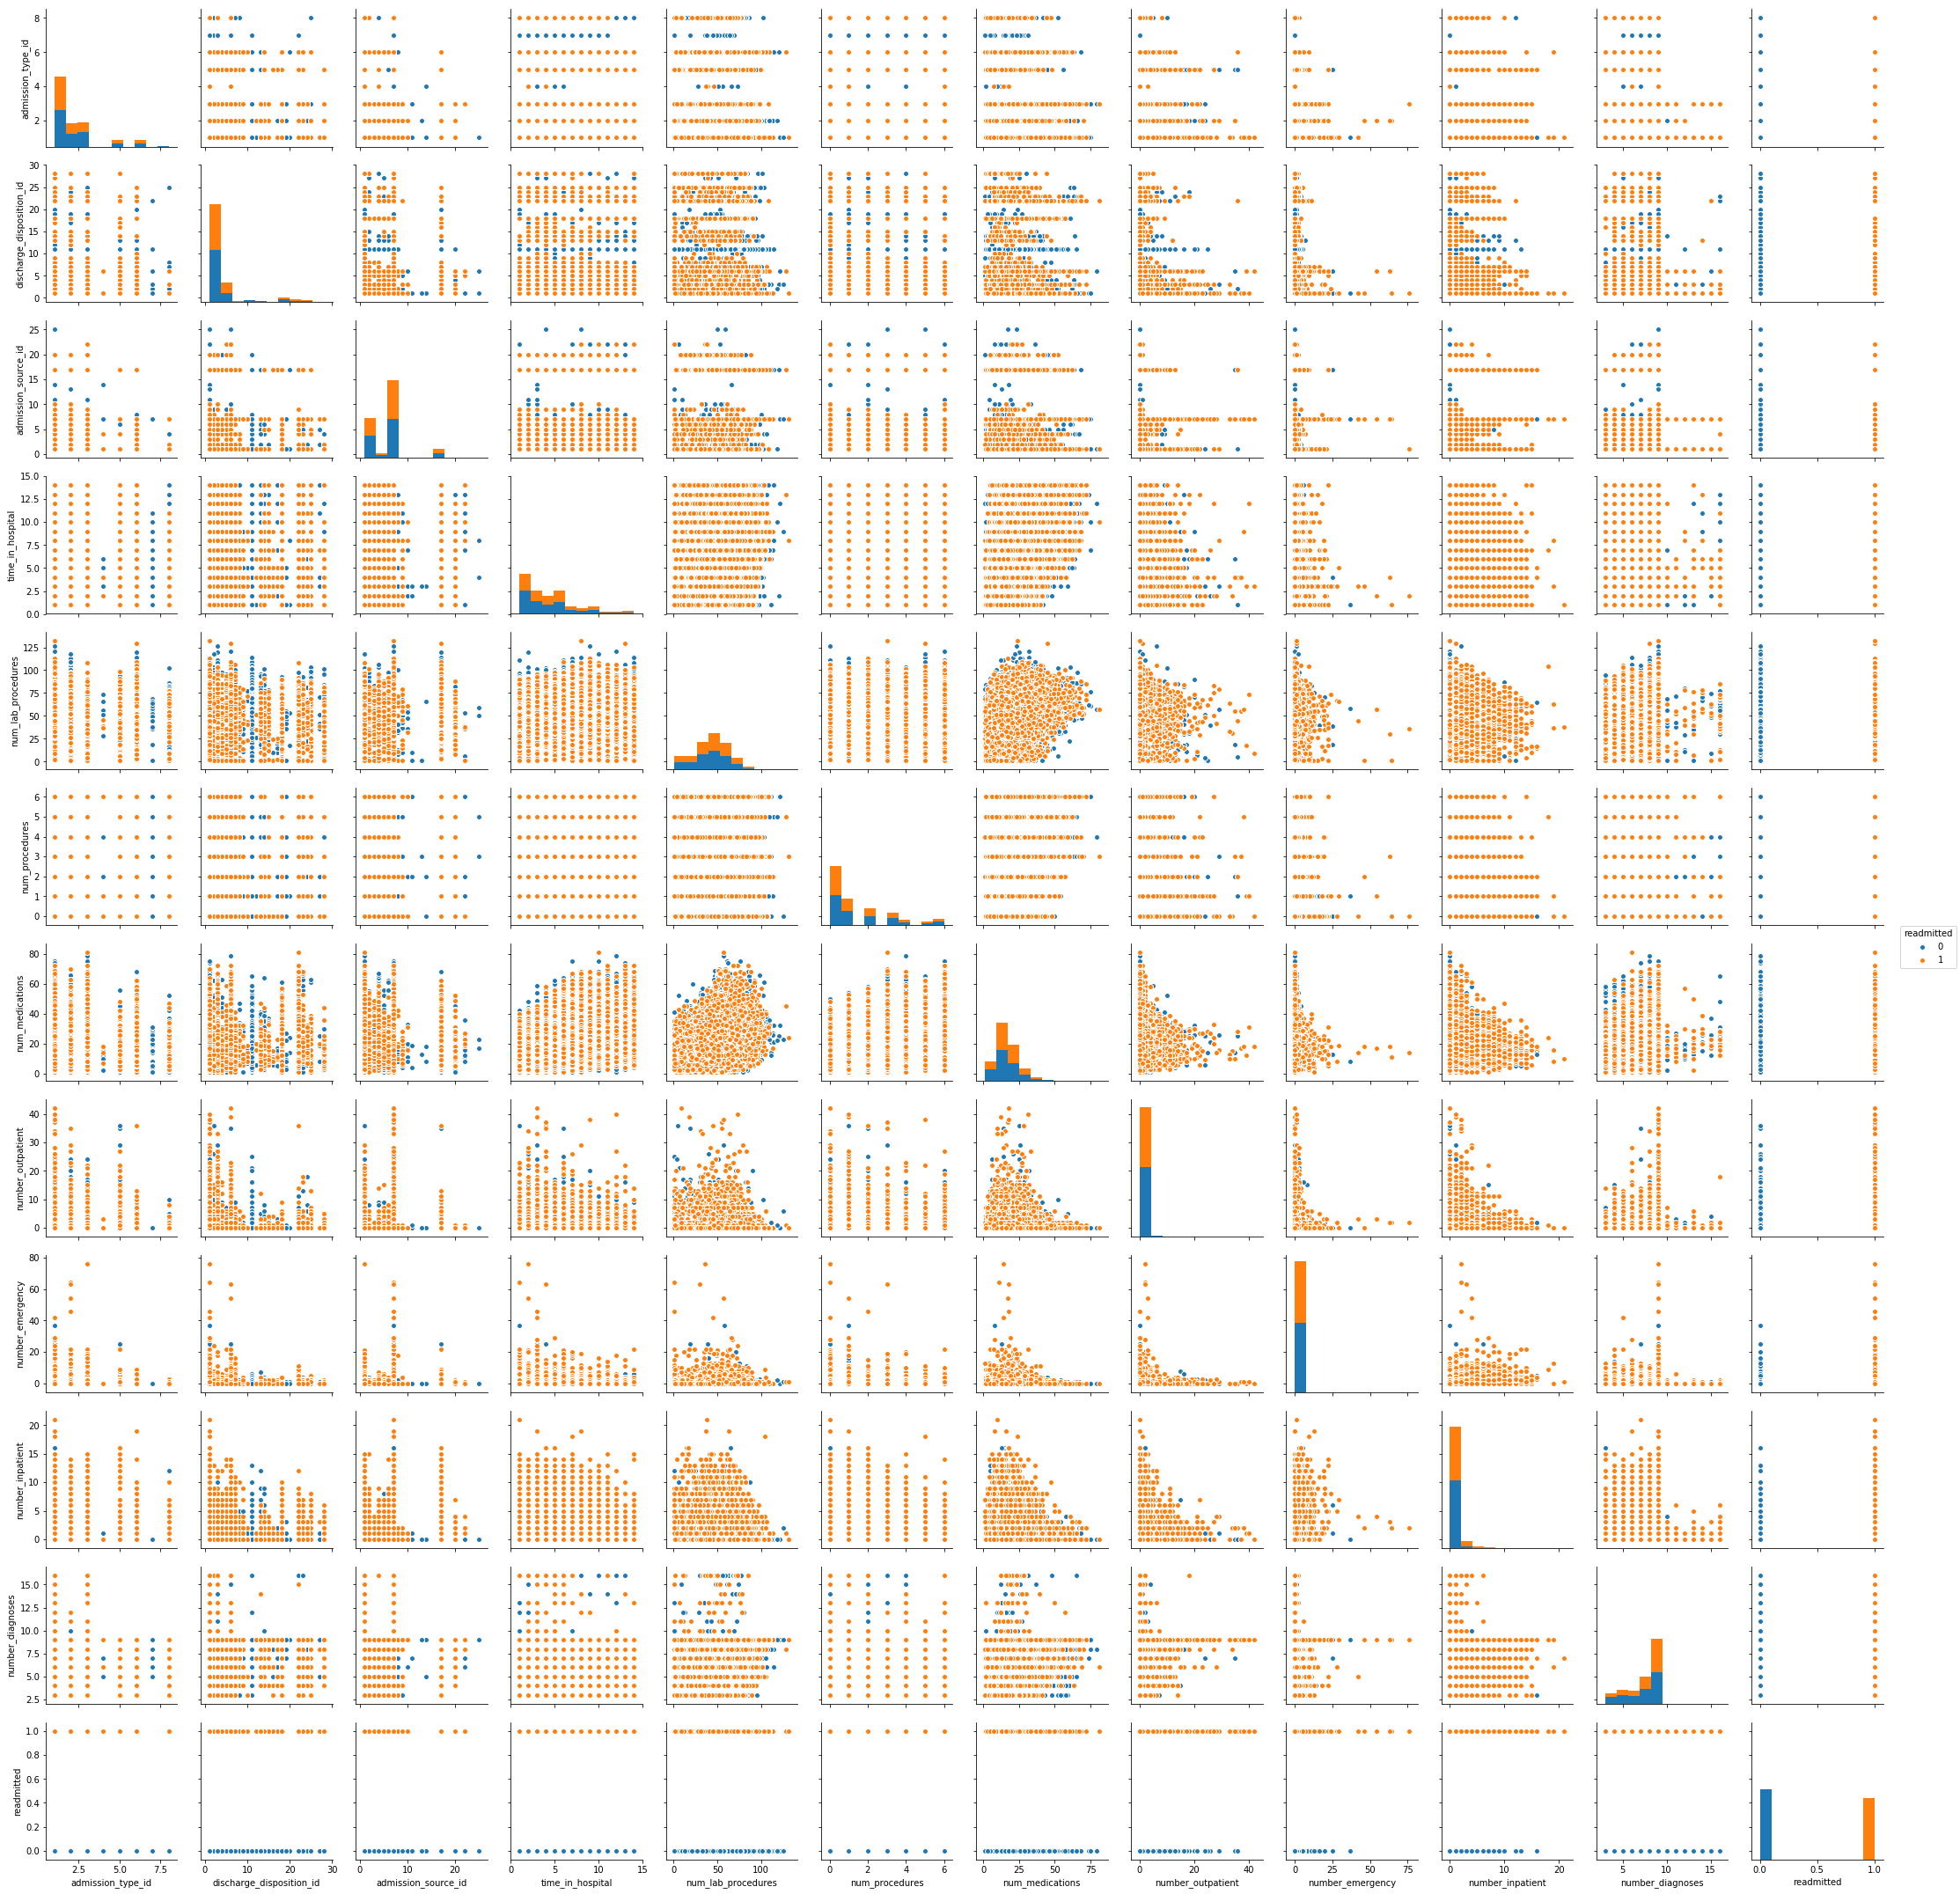

In [25]:
sns.pairplot(data=emergency[['race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']],hue='readmitted')

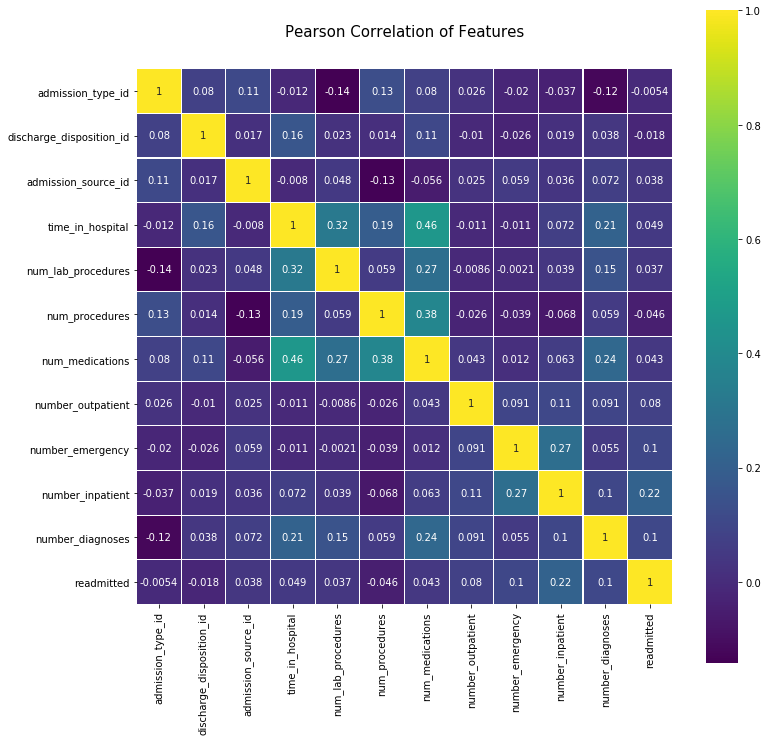

In [26]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(emergency.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white',annot=True)

Text(0,0.5,'Count')

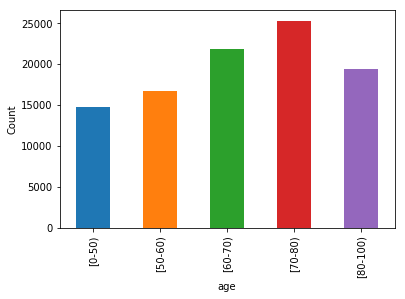

In [27]:
# Recategorize 'age' so that the population is more evenly distributed
emergency['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                         for val in emergency['age']], index=emergency.index)
emergency['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                         for val in emergency['age']], index=emergency.index)

emergency.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

In [28]:
emergency.discharge_disposition_id.value_counts()

1     57609
3     13564
6     12626
18     3624
2      2049
22     1970
11     1606
5      1127
25      941
4       756
7       592
23      400
13      396
14      368
28      137
8       106
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [29]:
# original 'discharge_disposition_id' contains 28 levels
# reduce 'discharge_disposition_id' levels into 2 categories
# discharge_disposition_id = 1 corresponds to 'Discharge Home'
emergency['discharge_disposition_id'] = pd.Series(['Home' if val == 1 else 'Other discharge' 
                                              for val in emergency['discharge_disposition_id']], index=emergency.index)

In [30]:
emergency.admission_source_id.value_counts()

7     55951
1     28355
17     6602
4      2945
6      1893
2      1031
5       846
3       179
20      160
9        49
8        15
22       12
10        7
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [31]:
# original 'admission_source_id' contains 25 levels
# reduce 'admission_source_id' into 3 categories
emergency['admission_source_id'] = pd.Series(['Emergency Room' if val == 7 else 'Referral' if val == 1 else 'Other source' 
                                              for val in emergency['admission_source_id']], index=emergency.index)

In [32]:
emergency.admission_type_id.value_counts()

1    52178
3    18193
2    17543
6     5135
5     4661
8      312
7       20
4       10
Name: admission_type_id, dtype: int64

In [33]:
# original 'admission_type_id' contains 8 levels
# reduce 'admission_type_id' into 2 categories
emergency['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Other type' 
                                              for val in emergency['admission_type_id']], index=emergency.index)

23 features represent different medications, should we use them all in the model?

How to deal with 'diag_1', 'diag_2', and 'diag_3'?

Based on the results found in Reference[1], we know that:

The statistical model suggests that the relationship between the probability of readmission and the HbA1c measurement depends on the primary diagnosis.

The only medication that varied significantly across the patients was the delivery of insulin, while other medications remained common among all the patients.

It may not be surprising that the attention given to diabetes care in individuals with admitting diagnoses of circulatory or respiratory diseases may have been less than those with a primary diagnosis of diabetes mellitus.

Greater attention to diabetes care during the hospitalization for these high-risk individuals may have a significant impact on readmission.

The primary, secondary, and third medical diagnoses are marked by the ICD9 codes.

ICD9 code for diabetes: 250.xx

Text(0,0.5,'Count')

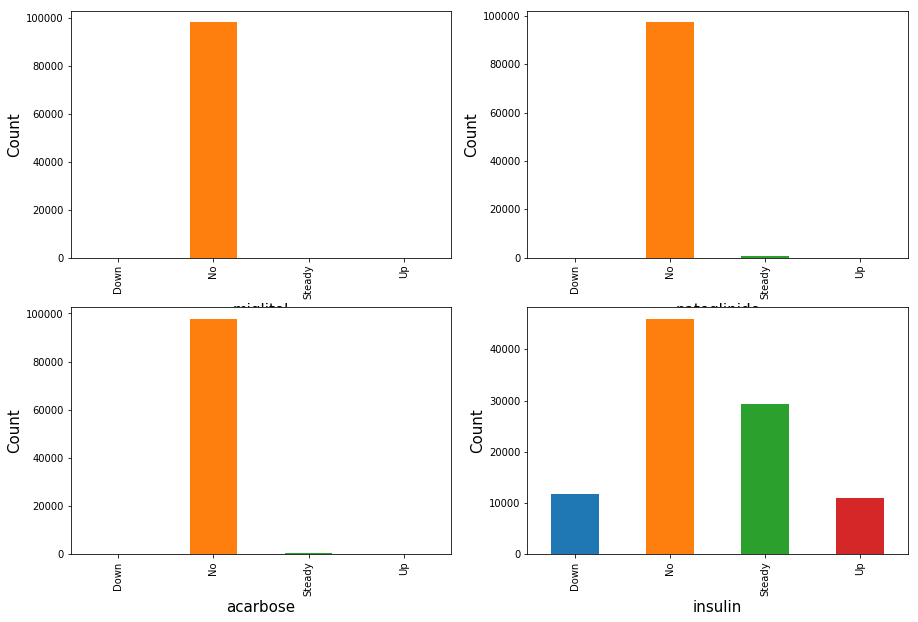

In [34]:
# compare diabetes medications 'miglitol', 'nateglinide' and 'acarbose' with 'insulin', as an example
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax1 = emergency.groupby('miglitol').size().plot(kind='bar')
plt.xlabel('miglitol', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax2 = fig.add_subplot(222)
ax2 = emergency.groupby('nateglinide').size().plot(kind='bar')
plt.xlabel('nateglinide', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax3 = fig.add_subplot(223)
ax3 = emergency.groupby('acarbose').size().plot(kind='bar')
plt.xlabel('acarbose', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax4 = fig.add_subplot(224)
ax4 = emergency.groupby('insulin').size().plot(kind='bar')
plt.xlabel('insulin', fontsize=15)
plt.ylabel('Count', fontsize=15)


C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Count')

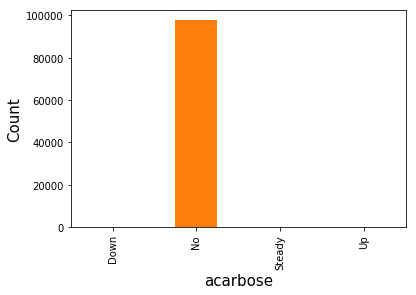

In [35]:
ax3 = fig.add_subplot(221)
ax3 = emergency.groupby('acarbose').size().plot(kind='bar')
plt.xlabel('acarbose', fontsize=15)
plt.ylabel('Count', fontsize=15)

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Count')

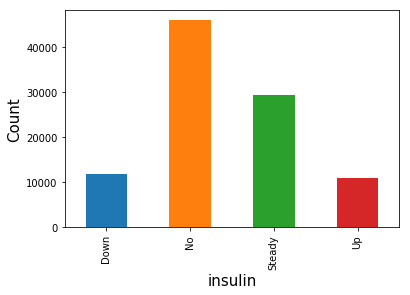

In [36]:



ax4 = fig.add_subplot(222)
ax4 = emergency.groupby('insulin').size().plot(kind='bar')
plt.xlabel('insulin', fontsize=15)
plt.ylabel('Count', fontsize=15)

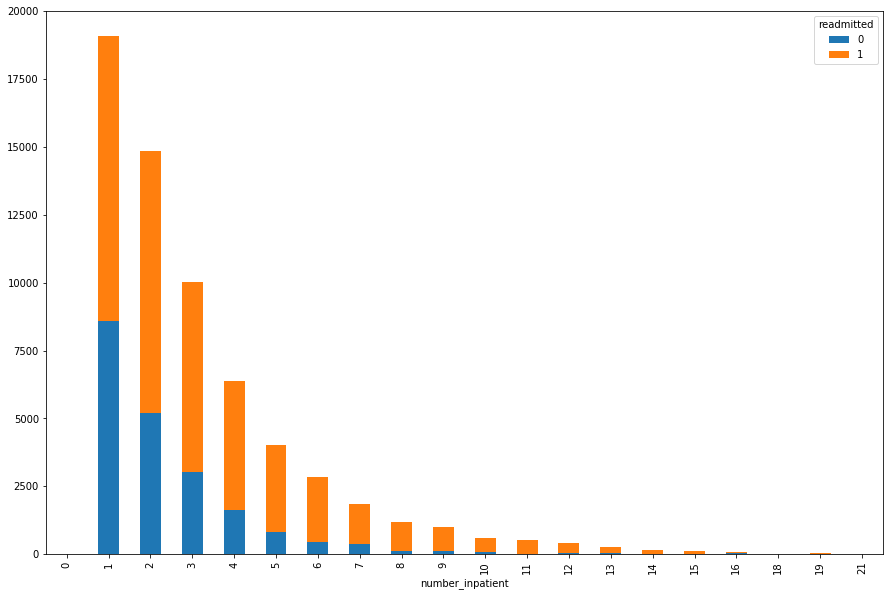

In [37]:
emerg = emergency.groupby(['number_inpatient','readmitted'])['number_inpatient'].sum().unstack().fillna(0)
emerg.plot(kind='bar', stacked=True,figsize=(15, 10))

In [38]:
# keep only 'insulin' and remove the other 22 diabetes medications
emergency.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)

In [39]:
# denote 'diag_1' as '1' if it relates to diabetes and '0' if it's not
# remove 'diag_2' and 'diag_3'
emergency['diag_1'] = pd.Series([1 if val.startswith('250') else 0 for val in emergency['diag_1']], index=emergency.index)
emergency.drop(['diag_2', 'diag_3'], axis=1, inplace=True)

In [40]:
emergency

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_emergency,number_inpatient,diag_1,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
1,Caucasian,Female,[0-50),Emergency,Home,Emergency Room,3,59,0,18,...,0,0,0,9,None,None,Up,Ch,Yes,1
2,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency Room,2,11,5,13,...,0,1,0,6,None,None,No,No,Yes,0
3,Caucasian,Male,[0-50),Emergency,Home,Emergency Room,2,44,1,16,...,0,0,0,7,None,None,Up,Ch,Yes,0
4,Caucasian,Male,[0-50),Emergency,Home,Emergency Room,1,51,0,8,...,0,0,0,5,None,None,Steady,Ch,Yes,0
5,Caucasian,Male,[50-60),Other type,Home,Other source,3,31,6,16,...,0,0,0,9,None,None,Steady,No,Yes,1
6,Caucasian,Male,[60-70),Other type,Home,Other source,4,70,1,21,...,0,0,0,7,None,None,Steady,Ch,Yes,0
7,Caucasian,Male,[70-80),Emergency,Home,Emergency Room,5,73,0,12,...,0,0,0,8,None,None,No,No,Yes,1
8,Caucasian,Female,[80-100),Other type,Home,Other source,13,68,2,28,...,0,0,0,8,None,None,Steady,Ch,Yes,0
9,Caucasian,Female,[80-100),Other type,Other discharge,Other source,12,33,3,18,...,0,0,0,8,None,None,Steady,Ch,Yes,0
10,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency Room,9,47,2,17,...,0,0,1,9,None,None,Steady,No,Yes,1


In [41]:
emergency.shape

(98052, 21)

In [42]:
list(emergency.columns)

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

# Dummy variable Creation

In [43]:
emergency=pd.get_dummies(emergency)

In [44]:
emergency

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,number_diagnoses,readmitted,...,A1Cresult_None,A1Cresult_Norm,insulin_Down,insulin_No,insulin_Steady,insulin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
1,3,59,0,18,0,0,0,0,9,1,...,1,0,0,0,0,1,1,0,0,1
2,2,11,5,13,2,0,1,0,6,0,...,1,0,0,1,0,0,0,1,0,1
3,2,44,1,16,0,0,0,0,7,0,...,1,0,0,0,0,1,1,0,0,1
4,1,51,0,8,0,0,0,0,5,0,...,1,0,0,0,1,0,1,0,0,1
5,3,31,6,16,0,0,0,0,9,1,...,1,0,0,0,1,0,0,1,0,1
6,4,70,1,21,0,0,0,0,7,0,...,1,0,0,0,1,0,1,0,0,1
7,5,73,0,12,0,0,0,0,8,1,...,1,0,0,1,0,0,0,1,0,1
8,13,68,2,28,0,0,0,0,8,0,...,1,0,0,0,1,0,1,0,0,1
9,12,33,3,18,0,0,0,0,8,0,...,1,0,0,0,1,0,1,0,0,1
10,9,47,2,17,0,0,0,1,9,1,...,1,0,0,0,1,0,0,1,0,1


In [58]:
emergency.shape

(98052, 45)

In [45]:
emergency.isnull().any()

time_in_hospital                            False
num_lab_procedures                          False
num_procedures                              False
num_medications                             False
number_outpatient                           False
number_emergency                            False
number_inpatient                            False
diag_1                                      False
number_diagnoses                            False
readmitted                                  False
race_AfricanAmerican                        False
race_Asian                                  False
race_Caucasian                              False
race_Hispanic                               False
race_Other                                  False
gender_Female                               False
gender_Male                                 False
age_[0-50)                                  False
age_[50-60)                                 False
age_[60-70)                                 False


Data Preparation Summary

Remove NA in 'race', 'gender', 'diag_1', 'diag_2', and 'diag_3'

Remove 29 features in total: 'encounter_id', 'patient_nbr', 'payer_code', 'weight', 'medical_specialty', 'diag_2', 'diag_3', and 22 features for medications, including 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', and 'metformin-pioglitazone'

Recategorize 'age' feature

Reduce levels in 'discharge_disposition_id', 'admission_source_id', and 'admission_type_id'

One-hot-encode on categorical data

Square root transform on right skewed count data

Apply feature standardizing on numerical data


# Feature Importance

Evaluate the importance of different features by using emsemble method.

In [46]:
# create X (features) and y (response)
X = emergency.drop(['readmitted'], axis=1)
y = emergency['readmitted']
print(X)
print(y)

        time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
1                      3                  59               0               18   
2                      2                  11               5               13   
3                      2                  44               1               16   
4                      1                  51               0                8   
5                      3                  31               6               16   
6                      4                  70               1               21   
7                      5                  73               0               12   
8                     13                  68               2               28   
9                     12                  33               3               18   
10                     9                  47               2               17   
11                     7                  62               0               11   
12                     7    

In [47]:
# split X and y into cross-validation (75%) and testing (25%) data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [48]:
X_train.head(20)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,number_diagnoses,race_AfricanAmerican,...,A1Cresult_None,A1Cresult_Norm,insulin_Down,insulin_No,insulin_Steady,insulin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
27134,2,50,0,3,0,0,0,0,7,0,...,1,0,0,1,0,0,0,1,1,0
31790,1,37,1,7,0,0,0,0,5,1,...,1,0,0,0,1,0,0,1,0,1
19263,2,31,0,7,0,0,0,0,4,0,...,1,0,0,0,1,0,1,0,0,1
75370,5,60,1,12,0,0,4,0,9,0,...,1,0,0,0,1,0,0,1,0,1
38615,3,46,0,15,0,1,1,0,6,0,...,1,0,0,0,0,1,1,0,0,1
70182,3,48,0,20,3,0,0,0,6,0,...,1,0,0,1,0,0,0,1,1,0
18144,5,25,1,15,0,0,0,0,7,0,...,1,0,0,1,0,0,1,0,0,1
1234,2,46,0,5,0,0,0,0,3,0,...,1,0,0,0,1,0,1,0,0,1
12412,4,56,0,8,0,0,0,0,5,0,...,1,0,0,1,0,0,1,0,0,1
26402,4,80,0,10,0,1,0,0,8,0,...,0,0,0,0,1,0,0,1,0,1


In [49]:
y_test#actual values

48704     0
33204     0
38587     0
22481     1
100443    1
95450     0
98830     0
63789     1
7457      1
47148     1
83699     0
27185     1
40211     0
46230     1
28308     0
68112     1
16976     1
65462     0
14599     0
4212      0
67726     1
13673     0
7096      1
15286     0
38754     0
77204     0
87594     1
24524     1
11707     0
77004     1
         ..
16260     0
59307     0
59480     0
58819     1
28401     1
80235     1
87702     0
43141     1
19401     0
11295     0
17840     0
45124     0
19371     1
82277     0
78474     1
10747     0
49781     1
31629     1
24628     1
41836     0
18364     0
87010     1
100260    0
50035     1
3745      1
46548     0
77050     0
62773     0
6598      0
50056     1
Name: readmitted, Length: 24513, dtype: int64

# RANDOM FOREST

In [50]:
# fit Random Forest model to the cross-validation data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state = 0)
forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [51]:
forest.score(X_train,y_train)

0.9998640177320878

In [52]:
forest.score(X_test,y_test)

0.9998368212785053

In [53]:
forest.score(X,y)

0.9998572186186921

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#kfold=KFold(n_splits=6,random_state=0)

#score=cross_val_score(forest,X,y,cv=kfold,scoring="accuracy")

#score.mean()

In [54]:
y_predict=forest.predict(X_test)
y_predict#prdicted values

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm_df = pd.DataFrame(confusion_matrix(y_test, y_predict).T, index=forest.classes_,columns=forest.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True           0      1
Predicted              
0          13117      2
1              1  11393


In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13118
           1       1.00      1.00      1.00     11395

   micro avg       1.00      1.00      1.00     24513
   macro avg       1.00      1.00      1.00     24513
weighted avg       1.00      1.00      1.00     24513



ROC AUC: 1.00


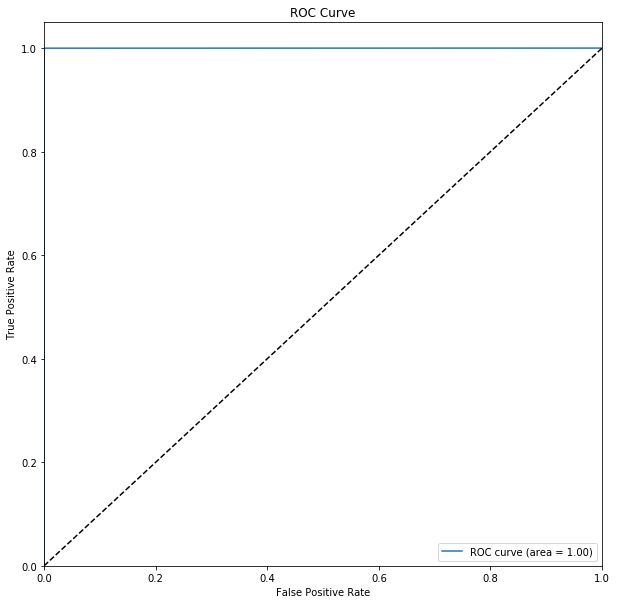

In [52]:
from sklearn.metrics import roc_curve, auc, roc_auc_score,cohen_kappa_score
fpr, tpr, _ = roc_curve(y_test, y_predict)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting 

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score,KFold

In [54]:
model1=GradientBoostingClassifier(learning_rate=0.1,n_estimators=500,max_depth=6)

In [55]:
model1.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [56]:
model1.score(X,y)

0.707389956349692

In [57]:
model1.score(X_train,y_train)

0.7078013027101266

In [58]:
model1.score(X_test,y_test)

0.7061559172683882

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
y_pred=model1.predict(X_test)

In [61]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[10373,  2745],
       [ 4458,  6937]], dtype=int64)

Confusion matrix
Table that describes the performance of a classification model.

True Positives (TP): we correctly predicted that they do have diabetes

True Negatives (TN): we correctly predicted that they don't have diabetes

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")

Sensitivity (Recall): How "sensitive" is the classifier to detecting positive instances? TP/(TP+FN)

In [62]:
from sklearn import metrics
metrics.recall_score(y_test, y_pred)

0.6087757788503729

F1 score: F1 = 2 x precision x recall / (precision + recall)

In [ ]:
#print(classification_report(y_test, y_predict))

In [63]:
metrics.f1_score(y_test, y_pred)

0.6582530720690799

Specificity: TN/(TN+FP)

Receiver operating characteristic (ROC) curve and area under the curve (AUC)
ROC is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. AUC is the percentage of the ROC plot that is underneath the curve. AUC is useful as a single number summary of classifier performance

ROC AUC: 0.70


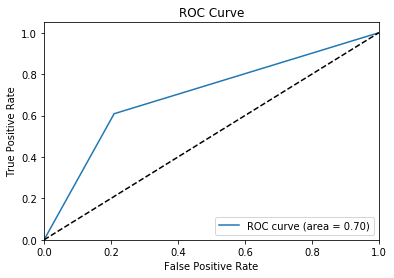

0.7061559172683882

In [64]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
model1.score(X_test,y_test)

Conclusions

Six major features are found to have high impact on diabetes patient readmission: number of lab procedures, number of medications administrated during the encounter, time spent in hospital, number of procedures other than lab tests, number of diagnoses, and number of inpatient visits.

The logistic regression classifier modeling achieves 0.62 accuracy and 0.66 AUC score. The sensitivity of the modeling can be increased by adjusting the classification threshold.

To correctly predict the readmission and avoid extra cost, hospitals should carefully examine the clinical data of patients and pay special attention to the above major features.

Some other features might be worth collecting, for example, date of admission and family history.

This analytic method can be applied to different diseases other than diabetes.

# LOGISTIC REGRESSION

In [ ]:
logit_reg = skl_lm.LogisticRegression()
logit_reg.fit(X_train, y_train)

In [ ]:
y_test

In [ ]:
logit_reg.score(X,y)

In [ ]:
logit_reg.score(X_train,y_train)

In [ ]:
logit_reg.score(X_test,y_test)

In [ ]:
kfold=KFold(n_splits=12,random_state=0)

score=cross_val_score(logit_reg,X,y,cv=kfold,scoring="accuracy")

score.mean()

In [ ]:
y_pred = logit_reg.predict(X_test)

In [ ]:
y_pred

In [ ]:
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=logit_reg.classes_,columns=logit_reg.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# TESTING DATA FOR RANDOM FOREST

In [64]:
Testing_data=pd.read_csv("testing_data.csv")

In [65]:
Testing_data.head(10)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,number_diagnoses,race_AfricanAmerican,...,A1Cresult_None,A1Cresult_Norm,insulin_Down,insulin_No,insulin_Steady,insulin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,3,59,0,18,0,0,0,0,9,0,...,0,0,0,0,1,0,0,0,1,1
1,5,20,0,12,0,0,1,1,5,1,...,1,1,1,1,1,1,1,1,1,1
2,4,25,1,22,1,1,1,0,7,1,...,0,0,0,0,1,1,1,1,1,0
3,2,5,4,9,0,0,0,1,6,0,...,0,0,0,0,1,1,1,1,1,0
4,1,8,7,10,0,0,0,1,6,0,...,0,0,0,0,1,1,1,1,1,0


In [66]:
list(Testing_data.columns)

['time_in_hospital ',
 'num_lab_procedures',
 'num_procedures ',
 'num_medications ',
 'number_outpatient',
 'number_emergency',
 'number_inpatient ',
 'diag_1 ',
 'number_diagnoses',
 'race_AfricanAmerican ',
 'race_Asian ',
 'race_Caucasian ',
 'race_Hispanic  ',
 'race_Other',
 'gender_Female',
 'gender_Male ',
 'age_[0-50)',
 'age_[50-60) ',
 'age_[60-70) ',
 'age_[70-80) ',
 'age_[80-100) ',
 'admission_type_id_Emergency',
 'admission_type_id_Other type ',
 'discharge_disposition_id_Home',
 'discharge_disposition_id_Other discharge',
 'admission_source_id_Emergency Room ',
 'admission_source_id_Other source',
 'admission_source_id_Referral ',
 'max_glu_serum_>200 ',
 'max_glu_serum_>300',
 'max_glu_serum_None',
 'max_glu_serum_Norm ',
 'A1Cresult_>7',
 'A1Cresult_>8',
 'A1Cresult_None ',
 'A1Cresult_Norm',
 'insulin_Down',
 'insulin_No ',
 'insulin_Steady',
 'insulin_Up ',
 'change_Ch ',
 'change_No',
 'diabetesMed_No',
 'diabetesMed_Yes']

In [67]:
forest.predict(Testing_data)

array([0, 0, 1, 0, 0], dtype=int64)

In [68]:
submission_predict=forest.predict(Testing_data)

In [71]:
submission=pd.DataFrame(data = {'Readmitted':submission_predict})

In [72]:
submission["Readmitted"]=submission["Readmitted"].map({1: "Y", 0: "N"})

In [73]:
submission.to_csv('Sample_Submission.csv',index = False)